# Töö uue andmestikuga

**NB! andmestiku peab manuaalselt alla tõmbamba kuna githubi limiit on 100 MB**
https://www.kaggle.com/datasets/yuanyuwendymu/airline-delay-and-cancellation-data-2009-2018/data?select=2013.csv - 2013.csv

In [1]:
%pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [2]:
import kagglehub

#Download latest version
path = kagglehub.dataset_download("yuanyuwendymu/airline-delay-and-cancellation-data-2009-2018")

print("Path to dataset files:", path)

100%|█████████████████████████████████████████████████████████████████████████████| 1.95G/1.95G [03:32<00:00, 9.85MB/s]

Extracting files...


Path to dataset files: C:\Users\Rainer\.cache\kagglehub\datasets\yuanyuwendymu\airline-delay-and-cancellation-data-2009-2018\versions\1


In [3]:
%pip install pandas
%pip install numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np

df=pd.read_csv('2013.csv')

Let's start working with the 2013's data. Let's check at first which features it has by printing the first 5 rows and then checking the dataset's dimensions.



In [5]:

print(df.head(5))



print(f"Dimensions of the dataset are: {np.shape(df)}")


      FL_DATE OP_CARRIER  OP_CARRIER_FL_NUM ORIGIN DEST  CRS_DEP_TIME  \
0  2013-01-01         VX                108    LAX  IAD           700   
1  2013-01-01         VX                114    LAX  IAD          2205   
2  2013-01-01         VX                 11    JFK  SFO           730   
3  2013-01-01         VX                121    PHL  LAX           700   
4  2013-01-01         VX                124    LAX  PHL          1100   

   DEP_TIME  DEP_DELAY  TAXI_OUT  WHEELS_OFF  ...  CRS_ELAPSED_TIME  \
0     700.0        0.0       8.0       708.0  ...             285.0   
1    2204.0       -1.0      12.0      2216.0  ...             280.0   
2     729.0       -1.0      18.0       747.0  ...             405.0   
3     700.0        0.0      14.0       714.0  ...             360.0   
4    1104.0        4.0      12.0      1116.0  ...             315.0   

   ACTUAL_ELAPSED_TIME  AIR_TIME  DISTANCE  CARRIER_DELAY  WEATHER_DELAY  \
0                258.0     243.0    2288.0            NaN 

We can also see that we have 6369482 rows and 28 columns in that dataset.

In [6]:
print(df.loc[100]) # Let's check how row with index 100 looks like

FL_DATE                2013-01-01
OP_CARRIER                     VX
OP_CARRIER_FL_NUM             783
ORIGIN                        LAX
DEST                          SEA
CRS_DEP_TIME                 1235
DEP_TIME                   1235.0
DEP_DELAY                     0.0
TAXI_OUT                      9.0
WHEELS_OFF                 1244.0
WHEELS_ON                  1459.0
TAXI_IN                       8.0
CRS_ARR_TIME                 1515
ARR_TIME                   1507.0
ARR_DELAY                    -8.0
CANCELLED                     0.0
CANCELLATION_CODE             NaN
DIVERTED                      0.0
CRS_ELAPSED_TIME            160.0
ACTUAL_ELAPSED_TIME         152.0
AIR_TIME                    135.0
DISTANCE                    954.0
CARRIER_DELAY                 NaN
WEATHER_DELAY                 NaN
NAS_DELAY                     NaN
SECURITY_DELAY                NaN
LATE_AIRCRAFT_DELAY           NaN
Unnamed: 27                   NaN
Name: 100, dtype: object


In [7]:
print(df.dtypes) # Let's check what the types of each column are and whether it is correct or not


FL_DATE                 object
OP_CARRIER              object
OP_CARRIER_FL_NUM        int64
ORIGIN                  object
DEST                    object
CRS_DEP_TIME             int64
DEP_TIME               float64
DEP_DELAY              float64
TAXI_OUT               float64
WHEELS_OFF             float64
WHEELS_ON              float64
TAXI_IN                float64
CRS_ARR_TIME             int64
ARR_TIME               float64
ARR_DELAY              float64
CANCELLED              float64
CANCELLATION_CODE       object
DIVERTED               float64
CRS_ELAPSED_TIME       float64
ACTUAL_ELAPSED_TIME    float64
AIR_TIME               float64
DISTANCE               float64
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
Unnamed: 27            float64
dtype: object


After observing the meaning of each column and its values, it is important for us to change the way values are being formatted in the following columns: 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'CANCELLED', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY' and 'LATE_AIRCRAFT_DELAY'. Also, 'Unnamed: 27' column is useless so we can remove it.

Let's note that if we use other datasets in the future for evaluation, we need to apply those changes there as well in similar fashion.

Many changes are similar: they require changing the type from float64 to int64.

Those columns are as they follow: 'DEP_DELAY', 'TAXI_OUT', 'TAXI_IN', 'ARR_DELAY', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'.

There are also some columns that should be binary: 'CANCELLED', 'DIVERTED'.

Some columns require more complicated transformations so they would be in time format, those ones are as they follow: 'CRS_DEP_TIME', 'DEP_TIME', 'WHEELS_OFF', 'WHEELS_ON', 'CRS_ARR_TIME', 'ARR_TIME'.

Let's apply those changes now.

In [8]:
df = df.drop(columns=['Unnamed: 27'], errors='ignore') # Removing the useless column

columns_to_int = [
    'DEP_DELAY', 'TAXI_OUT', 'TAXI_IN', 'ARR_DELAY',
    'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY',
    'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'
] # Selecting the columns that should be changed to int64
df[columns_to_int] = df[columns_to_int].astype('Int64') # Applying changes

binary_columns = [
    'CANCELLED',
    'DIVERTED'
] # Selecting the columns that should be changed to binary

df[binary_columns] = df[binary_columns].astype('Int64') # Applying changes

Now, let's get to the tricky part. We currently have times mostly in 'HHMM' format but we should convert them to 'HH:MM' format. Let's define a function that should be able to convert the times into correct format.

In [9]:
def convert_to_time_format(value):
    if pd.isna(value):
        return pd.NaT
    value = int(value)  # In case it's stored as float
    hours = value // 100
    minutes = value % 100
    return f"{hours:02}:{minutes:02}"

Now, let's transform those columns by using this function.

In [10]:
time_columns = ['CRS_DEP_TIME', 'DEP_TIME', 'WHEELS_OFF', 'WHEELS_ON', 'CRS_ARR_TIME', 'ARR_TIME']
# Selecting the columns that should be transformed

for col in time_columns:
    df[col] = df[col].apply(convert_to_time_format) # Applying changes

Let's check if those changes were applied correctly.

In [11]:
print(df.dtypes)


FL_DATE                object
OP_CARRIER             object
OP_CARRIER_FL_NUM       int64
ORIGIN                 object
DEST                   object
CRS_DEP_TIME           object
DEP_TIME               object
DEP_DELAY               Int64
TAXI_OUT                Int64
WHEELS_OFF             object
WHEELS_ON              object
TAXI_IN                 Int64
CRS_ARR_TIME           object
ARR_TIME               object
ARR_DELAY               Int64
CANCELLED               Int64
CANCELLATION_CODE      object
DIVERTED                Int64
CRS_ELAPSED_TIME        Int64
ACTUAL_ELAPSED_TIME     Int64
AIR_TIME                Int64
DISTANCE                Int64
CARRIER_DELAY           Int64
WEATHER_DELAY           Int64
NAS_DELAY               Int64
SECURITY_DELAY          Int64
LATE_AIRCRAFT_DELAY     Int64
dtype: object


Types are correct now.

In [12]:
print(df.loc[100])

FL_DATE                2013-01-01
OP_CARRIER                     VX
OP_CARRIER_FL_NUM             783
ORIGIN                        LAX
DEST                          SEA
CRS_DEP_TIME                12:35
DEP_TIME                    12:35
DEP_DELAY                       0
TAXI_OUT                        9
WHEELS_OFF                  12:44
WHEELS_ON                   14:59
TAXI_IN                         8
CRS_ARR_TIME                15:15
ARR_TIME                    15:07
ARR_DELAY                      -8
CANCELLED                       0
CANCELLATION_CODE             NaN
DIVERTED                        0
CRS_ELAPSED_TIME              160
ACTUAL_ELAPSED_TIME           152
AIR_TIME                      135
DISTANCE                      954
CARRIER_DELAY                <NA>
WEATHER_DELAY                <NA>
NAS_DELAY                    <NA>
SECURITY_DELAY               <NA>
LATE_AIRCRAFT_DELAY          <NA>
Name: 100, dtype: object


After taking a look at a row (with 100 index), it seems that we have managed to make appropriate transformations, which is important for further analysis.

Let's check which columns have missing values and handle them appropriately.

In [13]:
df.isnull().sum()

FL_DATE                      0
OP_CARRIER                   0
OP_CARRIER_FL_NUM            0
ORIGIN                       0
DEST                         0
CRS_DEP_TIME                 0
DEP_TIME                 91681
DEP_DELAY                91681
TAXI_OUT                 94903
WHEELS_OFF               94903
WHEELS_ON                98275
TAXI_IN                  98275
CRS_ARR_TIME                 0
ARR_TIME                 98275
ARR_DELAY               110172
CANCELLED                    0
CANCELLATION_CODE      6273470
DIVERTED                     0
CRS_ELAPSED_TIME             5
ACTUAL_ELAPSED_TIME     110172
AIR_TIME                110172
DISTANCE                     0
CARRIER_DELAY          5100205
WEATHER_DELAY          5100205
NAS_DELAY              5100205
SECURITY_DELAY         5100205
LATE_AIRCRAFT_DELAY    5100205
dtype: int64

It's alarming that amount of missing values in WHEELS_OFF and WHEELS_ON isn't the same. Let's investigate.

In [14]:

filtered_df = df[df['WHEELS_OFF'].notna() & df['WHEELS_ON'].isna()] # Filtering rows where WHEELS_OFF is not missing, and WHEELS_ON is missing

pd.set_option('display.max_columns', None)

print(filtered_df.head(10)) # Showing the first 10 rows of the filtered DataFrame

          FL_DATE OP_CARRIER  OP_CARRIER_FL_NUM ORIGIN DEST CRS_DEP_TIME  \
3245   2013-01-01         EV               4204    EWR  OKC        19:30   
6325   2013-01-01         MQ               4050    PIT  ORD        16:50   
6774   2013-01-01         OO               7407    SLC  SUN        20:05   
6837   2013-01-01         OO               5440    PDX  RDM        21:50   
7226   2013-01-01         OO               2987    PHX  SBP        21:05   
7272   2013-01-01         OO               5336    LAX  SBP        20:35   
7574   2013-01-01         OO               5414    SFO  RDM        21:10   
8137   2013-01-01         OO               7401    SLC  SUN        11:25   
11336  2013-01-01         AA                475    DCA  DFW        08:10   
17673  2013-01-02         AS                 66    YAK  JNU        18:30   

      DEP_TIME  DEP_DELAY  TAXI_OUT WHEELS_OFF WHEELS_ON  TAXI_IN  \
3245     20:16         46        12      20:28       NaT     <NA>   
6325     16:43         -7

The issue is that there is no data about the flight arriving. It is as if the plane has been in the air for years. Having such rows will not do us any good for analysis. Therefore, we will need to use an imputation strategy. The best strategy seems to be using list-wise deletion which means that the rows that have missing values in that column will not be included.

In [15]:
df_cleaned = df[~((df['WHEELS_OFF'].notna()) & (df['WHEELS_ON'].isna()))]


In [16]:
df_cleaned.isnull().sum()

FL_DATE                      0
OP_CARRIER                   0
OP_CARRIER_FL_NUM            0
ORIGIN                       0
DEST                         0
CRS_DEP_TIME                 0
DEP_TIME                 91681
DEP_DELAY                91681
TAXI_OUT                 94903
WHEELS_OFF               94903
WHEELS_ON                94903
TAXI_IN                  94903
CRS_ARR_TIME                 0
ARR_TIME                 94903
ARR_DELAY               106800
CANCELLED                    0
CANCELLATION_CODE      6271207
DIVERTED                     0
CRS_ELAPSED_TIME             3
ACTUAL_ELAPSED_TIME     106800
AIR_TIME                106800
DISTANCE                     0
CARRIER_DELAY          5096833
WEATHER_DELAY          5096833
NAS_DELAY              5096833
SECURITY_DELAY         5096833
LATE_AIRCRAFT_DELAY    5096833
dtype: int64

There is still an alarming thing that amount of missing values is not the same for 'DEP_TIME' and 'WHEELS_OFF'. Let's investigate.

In [17]:
filtered_df = df_cleaned[df_cleaned['DEP_TIME'].notna() & df_cleaned['WHEELS_OFF'].isna()] # Filtering rows where DEP_TIME is not missing, and WHEELS_OFF is missing

pd.set_option('display.max_columns', None)

print(filtered_df.head(10)) # Showing the first 10 rows of the filtered DataFrame

          FL_DATE OP_CARRIER  OP_CARRIER_FL_NUM ORIGIN DEST CRS_DEP_TIME  \
8998   2013-01-01         US                448    SLC  CLT        23:59   
15578  2013-01-02         9E               3863    MEM  ATL        07:15   
15893  2013-01-02         9E               4335    SAT  MEM        06:00   
22557  2013-01-02         OO               5580    LAX  ASE        18:50   
22812  2013-01-02         OO               6210    DFW  ORD        06:00   
26648  2013-01-02         EV               4654    IAH  HRL        17:31   
27460  2013-01-02         EV               5702    ORD  CAE        19:58   
41724  2013-01-03         OO               5439    EUG  PDX        05:45   
44844  2013-01-03         US                240    CMH  PHX        07:30   
47848  2013-01-03         AA               1792    ORD  MIA        14:30   

      DEP_TIME  DEP_DELAY  TAXI_OUT WHEELS_OFF WHEELS_ON  TAXI_IN  \
8998     01:07         68      <NA>        NaT       NaT     <NA>   
15578    07:16          1

It seems like there are cases where airplane has departed but has not touched off the ground. This would mean that airport has been driving on land for years which makes no sense. Let's use list-wise deletion once again to fix this.

In [18]:
df_cleaned2 = df_cleaned[~((df_cleaned['DEP_TIME'].notna()) & (df_cleaned['WHEELS_OFF'].isna()))]

In [19]:
df_cleaned2.isnull().sum()

FL_DATE                      0
OP_CARRIER                   0
OP_CARRIER_FL_NUM            0
ORIGIN                       0
DEST                         0
CRS_DEP_TIME                 0
DEP_TIME                 91681
DEP_DELAY                91681
TAXI_OUT                 91681
WHEELS_OFF               91681
WHEELS_ON                91681
TAXI_IN                  91681
CRS_ARR_TIME                 0
ARR_TIME                 91681
ARR_DELAY               103578
CANCELLED                    0
CANCELLATION_CODE      6271207
DIVERTED                     0
CRS_ELAPSED_TIME             2
ACTUAL_ELAPSED_TIME     103578
AIR_TIME                103578
DISTANCE                     0
CARRIER_DELAY          5093611
WEATHER_DELAY          5093611
NAS_DELAY              5093611
SECURITY_DELAY         5093611
LATE_AIRCRAFT_DELAY    5093611
dtype: int64

We can notice that there are 2 cases in which 'CRS_ELAPSED_TIME' had a missing value. However, it is possible to calculate it by using columns 'CRS_ARR_TIME' and 'CRS_DEP_TIME' which have no missing values.

In [20]:
missing_crs_elapsed_time = df_cleaned2[df_cleaned2['CRS_ELAPSED_TIME'].isna()]


print(missing_crs_elapsed_time[['CRS_DEP_TIME', 'CRS_ARR_TIME', 'CRS_ELAPSED_TIME']].head(2))

        CRS_DEP_TIME CRS_ARR_TIME  CRS_ELAPSED_TIME
1060780        12:25        14:02              <NA>
5768226        14:28        16:20              <NA>


As we see, it is possible to calculate it but we would also need to consider timezone difference so let's check the whole rows.

In [21]:
print(missing_crs_elapsed_time.head(2))

            FL_DATE OP_CARRIER  OP_CARRIER_FL_NUM ORIGIN DEST CRS_DEP_TIME  \
1060780  2013-03-05         F9                533    MDW  DEN        12:25   
5768226  2013-11-25         F9                233    BNA  DEN        14:28   

        DEP_TIME  DEP_DELAY  TAXI_OUT WHEELS_OFF WHEELS_ON  TAXI_IN  \
1060780      NaT       <NA>      <NA>        NaT       NaT     <NA>   
5768226      NaT       <NA>      <NA>        NaT       NaT     <NA>   

        CRS_ARR_TIME ARR_TIME  ARR_DELAY  CANCELLED CANCELLATION_CODE  \
1060780        14:02      NaT       <NA>          1                 A   
5768226        16:20      NaT       <NA>          1                 A   

         DIVERTED  CRS_ELAPSED_TIME  ACTUAL_ELAPSED_TIME  AIR_TIME  DISTANCE  \
1060780         0              <NA>                 <NA>      <NA>       895   
5768226         0              <NA>                 <NA>      <NA>      1014   

         CARRIER_DELAY  WEATHER_DELAY  NAS_DELAY  SECURITY_DELAY  \
1060780           <NA>

The flights are from MDW to DEN and from BNA to DEN. So from Chicago to Denver and from Nashville to Denver. Chicago and Nashville are in the same timezone and Denver is 1 hour behind them. This means that the first flight's 'CRS_ELAPSED_TIME' should be 97 + 60 = 157 and the second flight's 'CRS_ELAPSED_TIME' should be 112 + 60 = 172. Let's manually insert those values.

In [22]:
df_cleaned2.loc[df_cleaned2.index == 1060780, 'CRS_ELAPSED_TIME'] = 157  # MDW to DEN
df_cleaned2.loc[df_cleaned2.index == 5768226, 'CRS_ELAPSED_TIME'] = 172  # BNA to DEN


print(df_cleaned2.loc[[1060780, 5768226], ['CRS_DEP_TIME', 'CRS_ARR_TIME', 'CRS_ELAPSED_TIME']]) # Checking if the missing values have been filled

        CRS_DEP_TIME CRS_ARR_TIME  CRS_ELAPSED_TIME
1060780        12:25        14:02               157
5768226        14:28        16:20               172


This issue has now been resolved. Let's see if there are more problems within the data.

In [23]:
df_cleaned2.isnull().sum()

FL_DATE                      0
OP_CARRIER                   0
OP_CARRIER_FL_NUM            0
ORIGIN                       0
DEST                         0
CRS_DEP_TIME                 0
DEP_TIME                 91681
DEP_DELAY                91681
TAXI_OUT                 91681
WHEELS_OFF               91681
WHEELS_ON                91681
TAXI_IN                  91681
CRS_ARR_TIME                 0
ARR_TIME                 91681
ARR_DELAY               103578
CANCELLED                    0
CANCELLATION_CODE      6271207
DIVERTED                     0
CRS_ELAPSED_TIME             0
ACTUAL_ELAPSED_TIME     103578
AIR_TIME                103578
DISTANCE                     0
CARRIER_DELAY          5093611
WEATHER_DELAY          5093611
NAS_DELAY              5093611
SECURITY_DELAY         5093611
LATE_AIRCRAFT_DELAY    5093611
dtype: int64

There are still couple problems within our data. At first, amount of missing values in 'ARR_DELAY' is not equal to amount of missing values in 'ARR_TIME'. Let's investigate.

In [24]:
filtered_df = df_cleaned2[df_cleaned2['ARR_TIME'].notna() & df_cleaned2['ARR_DELAY'].isna()] # Filtering rows where ARR_TIME is not missing, and ARR_DELAY is missing

pd.set_option('display.max_columns', None)

print(filtered_df.head(10)) # Showing the first 10 rows of the filtered DataFrame

         FL_DATE OP_CARRIER  OP_CARRIER_FL_NUM ORIGIN DEST CRS_DEP_TIME  \
231   2013-01-01         WN                113    MCO  LAS        07:50   
846   2013-01-01         WN               3915    DEN  LAX        11:35   
3149  2013-01-01         EV               3806    EWR  STL        14:59   
3384  2013-01-01         EV               4333    EWR  TUL        19:30   
3614  2013-01-01         EV               4542    IAH  HSV        10:53   
3739  2013-01-01         EV               4627    CLE  DFW        12:13   
3845  2013-01-01         EV               4703    IAH  BRO        21:00   
4014  2013-01-01         EV               5425    ATL  CRW        12:06   
4394  2013-01-01         EV               6128    ORD  CRW        13:08   
4457  2013-01-01         EV               6066    DEN  ISN        10:23   

     DEP_TIME  DEP_DELAY  TAXI_OUT WHEELS_OFF WHEELS_ON  TAXI_IN CRS_ARR_TIME  \
231     07:56          6         6      08:02     10:51        4        10:10   
846     12:1

We can fix those missing values by calculating them. We need to do that for 'ARR_DELAY', 'ACTUAL_ELAPSED_TIME' and 'AIR_TIME'.

In [25]:
print(df_cleaned2.head(10))

      FL_DATE OP_CARRIER  OP_CARRIER_FL_NUM ORIGIN DEST CRS_DEP_TIME DEP_TIME  \
0  2013-01-01         VX                108    LAX  IAD        07:00    07:00   
1  2013-01-01         VX                114    LAX  IAD        22:05    22:04   
2  2013-01-01         VX                 11    JFK  SFO        07:30    07:29   
3  2013-01-01         VX                121    PHL  LAX        07:00    07:00   
4  2013-01-01         VX                124    LAX  PHL        11:00    11:04   
5  2013-01-01         VX                125    PHL  LAX        11:45    11:42   
6  2013-01-01         VX                126    LAX  PHL        15:45    15:44   
7  2013-01-01         VX                127    PHL  LAX        20:10    20:00   
8  2013-01-01         VX                 12    SFO  JFK        07:00    06:58   
9  2013-01-01         VX                130    LAX  PHL        21:40    21:39   

   DEP_DELAY  TAXI_OUT WHEELS_OFF WHEELS_ON  TAXI_IN CRS_ARR_TIME ARR_TIME  \
0          0         8      07

After reviewing the format from df_cleaned2, we can see that to calculate 'ARR_DELAY' by subtracting 'ARR_TIME' from 'CRS_ARR_TIME' and convert the result into minutes. We can calculate 'ACTUAL_ELAPSED_TIME' by adding 'ARR_DELAY' and 'CRS_ELAPSED_TIME'.  We can calculate 'AIR_TIME' by subtracting 'TAXI_IN' and 'TAXI_OUT' from 'ACTUAL_ELAPSED_TIME'. Let's fix this.

Let's initialize filtered_df once again to not waste too much computation.

In [26]:
filtered_df2 = df_cleaned2[df_cleaned2['ARR_TIME'].notna() & df_cleaned2['ARR_DELAY'].isna()]

Let's calculate 'ARR_DELAY'. Let's first find out how many minutes after midnight were 'ARR_TIME' and 'CRS_ARR_TIME'. Then find the difference in minutes. That way we would find 'ARR_DELAY' in minutes.

In [27]:
def time_to_minutes(time_str):
    # Split the time string into hours and minutes
    hours, minutes = map(int, time_str.split(':'))
    # Return the total minutes after midnight
    return hours * 60 + minutes


In [28]:
# Creating a copy of filtered_df2 to avoid SettingWithCopyWarning
filtered_df2_copy = filtered_df2.copy()

# Applying the function to 'ARR_TIME' and 'CRS_ARR_TIME' on the copied DataFrame
filtered_df2_copy['ARR_TIME_minutes'] = filtered_df2_copy['ARR_TIME'].apply(time_to_minutes)
filtered_df2_copy['CRS_ARR_TIME_minutes'] = filtered_df2_copy['CRS_ARR_TIME'].apply(time_to_minutes)

# Calculating 'ARR_DELAY' as the difference between 'ARR_TIME' and 'CRS_ARR_TIME'
filtered_df2_copy['ARR_DELAY'] = filtered_df2_copy['ARR_TIME_minutes'] - filtered_df2_copy['CRS_ARR_TIME_minutes']

# Calculating 'ACTUAL_ELAPSED_TIME' by adding 'ARR_DELAY' to 'CRS_ELAPSED_TIME'
filtered_df2_copy['ACTUAL_ELAPSED_TIME'] = filtered_df2_copy['ARR_DELAY'] + filtered_df2_copy['CRS_ELAPSED_TIME']

# Calculating 'AIR_TIME' by subtracting 'TAXI_IN' and 'TAXI_OUT' from 'ACTUAL_ELAPSED_TIME'
filtered_df2_copy['AIR_TIME'] = filtered_df2_copy['ACTUAL_ELAPSED_TIME'] - filtered_df2_copy['TAXI_IN'] - filtered_df2_copy['TAXI_OUT']

# Dropping the temporary columns 'ARR_TIME_minutes' and 'CRS_ARR_TIME_minutes'
filtered_df2_copy.drop(['ARR_TIME_minutes', 'CRS_ARR_TIME_minutes'], axis=1, inplace=True)


print(filtered_df2_copy[['ARR_TIME', 'CRS_ARR_TIME', 'ARR_DELAY', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME']].head(15))
print(filtered_df2_copy.head(15))


     ARR_TIME CRS_ARR_TIME  ARR_DELAY  ACTUAL_ELAPSED_TIME  AIR_TIME
231     10:55        10:10         45                  365       355
846     14:48        13:10         98                  253       229
3149    20:02        16:47        195                  363       328
3384    23:58        22:07        111                  328       305
3614    15:42        12:36        186                  289       268
3739    20:58        14:19        399                  585       548
3845    03:12        22:12      -1140                -1068     -1082
4014    19:19        13:26        353                  433       409
4394    18:44        15:35        189                  276       252
4457    15:20        13:17        123                  237       201
5571    19:02        18:15         47                  187       164
5881    12:54        09:15        219                  399       379
6546    10:15        08:20        115                  225       207
6647    19:34        18:05        

As visible from row with index 3845, this solution does not account for the cases in which plane arrived after midnight but was scheduled to arrive before midnight. After having a look on the data, it can be concluded that investigating those anomalies is tricky. One way is to determine from whole data how long the longest flights in the dataset took. Let's take a look at the most extreme 'CRS_ELAPSED_TIME' and 'ACTUAL_ELAPSED_TIME' values.

In [29]:
# Sorting the dataframe by 'CRS_ELAPSED_TIME' in descending order
max_elapsed_time_row = df_cleaned2.sort_values(by='CRS_ELAPSED_TIME', ascending=False).head(20)

# Display the row with the maximum elapsed time
print(max_elapsed_time_row[['FL_DATE', 'OP_CARRIER', 'OP_CARRIER_FL_NUM', 'CRS_ELAPSED_TIME', 'ARR_TIME', 'CRS_ARR_TIME']])


            FL_DATE OP_CARRIER  OP_CARRIER_FL_NUM  CRS_ELAPSED_TIME ARR_TIME  \
835400   2013-02-20         HA                 51               700    15:10   
1131928  2013-03-09         HA                 51               700    15:07   
634925   2013-02-08         HA                 51               700    15:01   
669520   2013-02-10         HA                 51               700    14:40   
810081   2013-02-19         HA                 51               700    14:57   
542552   2013-02-03         HA                 51               700    14:46   
608564   2013-02-07         HA                 51               700    15:28   
1096659  2013-03-07         HA                 51               700    15:11   
912962   2013-02-25         HA                 51               700    14:47   
567404   2013-02-04         HA                 51               700    15:21   
876046   2013-02-22         HA                 51               700    14:36   
942241   2013-02-26         HA          

In [30]:
# Sorting the dataframe by 'ACTUAL_ELAPSED_TIME' in descending order
max_elapsed_time_row = df_cleaned2.sort_values(by='ACTUAL_ELAPSED_TIME', ascending=False).head(20)


print(max_elapsed_time_row[['FL_DATE', 'OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ACTUAL_ELAPSED_TIME', 'ARR_TIME', 'CRS_ARR_TIME']])

            FL_DATE OP_CARRIER  OP_CARRIER_FL_NUM  ACTUAL_ELAPSED_TIME  \
6012182  2013-12-10         UA                 15                  738   
2471197  2013-05-23         UA                 15                  726   
1275325  2013-03-17         HA                 51                  721   
1278817  2013-03-17         UA                 15                  720   
575295   2013-02-05         HA                 51                  715   
5539159  2013-11-12         UA                 15                  714   
1241064  2013-03-15         HA                 51                  710   
605133   2013-02-06         HA                 51                  709   
5931952  2013-12-05         HA                 51                  709   
2929996  2013-06-18         UA                 15                  709   
1219119  2013-03-14         HA                 51                  704   
1253037  2013-03-16         HA                 51                  703   
1250025  2013-03-16         UA        

By estimating that flights that are going to be seen as an anomaly won't take over 12 hours (720 minutes) it is possible to classify a case as an anomaly (the flight was supposed to land before midnight but landed after midnight) if 'CRS_ARR_TIME' is from 12:00 to 23:59 and if 'ARR_TIME' is from 00:00 to 11:59. If both of those conditions are true then we should deal by calculating 'ARR_DELAY' in a different way.

In [31]:
filtered_df2_copy['ARR_TIME_minutes'] = filtered_df2_copy['ARR_TIME'].apply(time_to_minutes)
filtered_df2_copy['CRS_ARR_TIME_minutes'] = filtered_df2_copy['CRS_ARR_TIME'].apply(time_to_minutes)

# Identifying rows with anomaly conditions
anomalies = (filtered_df2_copy['CRS_ARR_TIME_minutes'] >= 720) & (filtered_df2_copy['ARR_TIME_minutes'] < 720)

# Adding 1440 minutes to 'ARR_TIME_minutes' for anomalies (arrived after midnight but was not supposed to)
filtered_df2_copy.loc[anomalies, 'ARR_TIME_minutes'] += 1440

# Recalculating 'ARR_DELAY' as the difference between 'ARR_TIME' and 'CRS_ARR_TIME'
filtered_df2_copy['ARR_DELAY'] = filtered_df2_copy['ARR_TIME_minutes'] - filtered_df2_copy['CRS_ARR_TIME_minutes']

# Recalculating 'ACTUAL_ELAPSED_TIME' by adding 'ARR_DELAY' to 'CRS_ELAPSED_TIME'
filtered_df2_copy['ACTUAL_ELAPSED_TIME'] = filtered_df2_copy['ARR_DELAY'] + filtered_df2_copy['CRS_ELAPSED_TIME']

# Recalculating 'AIR_TIME' by subtracting 'TAXI_IN' and 'TAXI_OUT' from 'ACTUAL_ELAPSED_TIME'
filtered_df2_copy['AIR_TIME'] = filtered_df2_copy['ACTUAL_ELAPSED_TIME'] - filtered_df2_copy['TAXI_IN'] - filtered_df2_copy['TAXI_OUT']

# Dropping the temporary columns 'ARR_TIME_minutes' and 'CRS_ARR_TIME_minutes'
filtered_df2_copy.drop(['ARR_TIME_minutes', 'CRS_ARR_TIME_minutes'], axis=1, inplace=True)

# Print the updated dataframe with the calculated columns
print(filtered_df2_copy[['ARR_TIME', 'CRS_ARR_TIME', 'ARR_DELAY', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME']].head(15))
print(filtered_df2_copy.head(15))

     ARR_TIME CRS_ARR_TIME  ARR_DELAY  ACTUAL_ELAPSED_TIME  AIR_TIME
231     10:55        10:10         45                  365       355
846     14:48        13:10         98                  253       229
3149    20:02        16:47        195                  363       328
3384    23:58        22:07        111                  328       305
3614    15:42        12:36        186                  289       268
3739    20:58        14:19        399                  585       548
3845    03:12        22:12        300                  372       358
4014    19:19        13:26        353                  433       409
4394    18:44        15:35        189                  276       252
4457    15:20        13:17        123                  237       201
5571    19:02        18:15         47                  187       164
5881    12:54        09:15        219                  399       379
6546    10:15        08:20        115                  225       207
6647    19:34        18:05        

Now we will apply the changes to the dataset we want to continue working with (df_cleaned2).

In [32]:
# Using .loc[] to ensure we are modifying the original DataFrame correctly
df_cleaned2.loc[df_cleaned2['ARR_DELAY'].isna(), 'ARR_DELAY'] = filtered_df2_copy['ARR_DELAY']
df_cleaned2.loc[df_cleaned2['ACTUAL_ELAPSED_TIME'].isna(), 'ACTUAL_ELAPSED_TIME'] = filtered_df2_copy['ACTUAL_ELAPSED_TIME']
df_cleaned2.loc[df_cleaned2['AIR_TIME'].isna(), 'AIR_TIME'] = filtered_df2_copy['AIR_TIME']

# Checking if it worked
print(df_cleaned2[['ARR_DELAY', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME']].head(15))
print(df_cleaned2.loc[3845])


    ARR_DELAY  ACTUAL_ELAPSED_TIME  AIR_TIME
0         -27                  258       243
1          -9                  272       247
2         -26                  380       356
3          14                  374       352
4         -38                  273       252
5          -1                  367       348
6         -46                  265       251
7           4                  369       343
8         -18                  319       295
9         -38                  268       251
10        -43                  280       266
11        -19                  371       348
12         -2                  316       292
13        -15                  373       357
14         -8                  381       361
FL_DATE                2013-01-01
OP_CARRIER                     EV
OP_CARRIER_FL_NUM            4703
ORIGIN                        IAH
DEST                          BRO
CRS_DEP_TIME                21:00
DEP_TIME                    23:30
DEP_DELAY                     150
TAXI_OUT

Now there are only few things left to check - whether amount of missing values in 'CANCELLATION_CODE' makes sense and whether the amounts of missing values in 'CARRIER_DELAY',
'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY' and 'LATE_AIRCRAFT_DELAY' make sense.

In [33]:
df_cleaned2.isnull().sum()

FL_DATE                      0
OP_CARRIER                   0
OP_CARRIER_FL_NUM            0
ORIGIN                       0
DEST                         0
CRS_DEP_TIME                 0
DEP_TIME                 91681
DEP_DELAY                91681
TAXI_OUT                 91681
WHEELS_OFF               91681
WHEELS_ON                91681
TAXI_IN                  91681
CRS_ARR_TIME                 0
ARR_TIME                 91681
ARR_DELAY                91681
CANCELLED                    0
CANCELLATION_CODE      6271207
DIVERTED                     0
CRS_ELAPSED_TIME             0
ACTUAL_ELAPSED_TIME      91681
AIR_TIME                 91681
DISTANCE                     0
CARRIER_DELAY          5093611
WEATHER_DELAY          5093611
NAS_DELAY              5093611
SECURITY_DELAY         5093611
LATE_AIRCRAFT_DELAY    5093611
dtype: int64

In [34]:
# Counting how many times a flight was not cancelled
cancelled_count = df_cleaned2[df_cleaned2['CANCELLED'] == 0].shape[0]

print(f'Number of instances where CANCELLED == 0: {cancelled_count}')


Number of instances where CANCELLED == 0: 6271207


For the last 5 columns, values seem to be missing randomly. Ideally, only 91681 values should be missing there but there are 5093611 values missing. As investigating common causes of delays and their average durations can be done separately, we will not remove from df_cleaned2 those 5093611 - 91681 = 5001930 values.

In [35]:
'''
# Explore data :DDDDDDDDD
# yes
mean_arr_delay = df['ARR_DELAY'].mean()
print(mean_arr_delay)

average_planned_flight_time = df['CRS_ELAPSED_TIME'].mean()
print(average_planned_flight_time)

average_flight_time = df['ACTUAL_ELAPSED_TIME'].mean()
print(average_flight_time)

average_distance = df['DISTANCE'].mean()
print(average_distance)
df['ARR_DELAY'].describe()
'''

"\n# Explore data :DDDDDDDDD\n# yes\nmean_arr_delay = df['ARR_DELAY'].mean()\nprint(mean_arr_delay)\n\naverage_planned_flight_time = df['CRS_ELAPSED_TIME'].mean()\nprint(average_planned_flight_time)\n\naverage_flight_time = df['ACTUAL_ELAPSED_TIME'].mean()\nprint(average_flight_time)\n\naverage_distance = df['DISTANCE'].mean()\nprint(average_distance)\ndf['ARR_DELAY'].describe()\n"

In [36]:
'''
import seaborn as sns
import matplotlib.pyplot as plt

# Mapping dictionary for cancellation codes
cancellation_map = {
    'A': 'Airline/Carrier',
    'B': 'Weather',
    'C': 'National Air System',
    'D': 'Security'
}

# Count the occurrences of each cancellation code
cancellation_counts = df['CANCELLATION_CODE'].value_counts()

# Create a bar plot with mapped labels
plt.figure(figsize=(10, 6))
sns.barplot(
    x=cancellation_counts.index.map(cancellation_map),
    y=cancellation_counts.values
)
plt.title('Cancellation Codes Frequency')
plt.xlabel('Cancellation Reason')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
'''

"\nimport seaborn as sns\nimport matplotlib.pyplot as plt\n\n# Mapping dictionary for cancellation codes\ncancellation_map = {\n    'A': 'Airline/Carrier',\n    'B': 'Weather',\n    'C': 'National Air System',\n    'D': 'Security'\n}\n\n# Count the occurrences of each cancellation code\ncancellation_counts = df['CANCELLATION_CODE'].value_counts()\n\n# Create a bar plot with mapped labels\nplt.figure(figsize=(10, 6))\nsns.barplot(\n    x=cancellation_counts.index.map(cancellation_map),\n    y=cancellation_counts.values\n)\nplt.title('Cancellation Codes Frequency')\nplt.xlabel('Cancellation Reason')\nplt.ylabel('Count')\nplt.xticks(rotation=45)\nplt.tight_layout()\nplt.show()\n"

In [37]:
'''
# Correlation between different types of delays
delay_columns = ['DEP_DELAY', 'ARR_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'CARRIER_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
delay_correlation = df[delay_columns].corr()
sns.heatmap(delay_correlation, annot=True, cmap='coolwarm')
'''

"\n# Correlation between different types of delays\ndelay_columns = ['DEP_DELAY', 'ARR_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'CARRIER_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']\ndelay_correlation = df[delay_columns].corr()\nsns.heatmap(delay_correlation, annot=True, cmap='coolwarm')\n"

In [38]:
'''
# Convert CRS_DEP_TIME to hour of day
df['DEP_HOUR'] = df['CRS_DEP_TIME'] // 100
delay_by_hour = df.groupby('DEP_HOUR')['ARR_DELAY'].mean()
delay_by_hour.plot(kind='line')
plt.xlabel('Hour of Day')
plt.ylabel('Average Arrival Delay')
'''

"\n# Convert CRS_DEP_TIME to hour of day\ndf['DEP_HOUR'] = df['CRS_DEP_TIME'] // 100\ndelay_by_hour = df.groupby('DEP_HOUR')['ARR_DELAY'].mean()\ndelay_by_hour.plot(kind='line')\nplt.xlabel('Hour of Day')\nplt.ylabel('Average Arrival Delay')\n"

In [39]:
'''
# Breakdown of delay types
delay_types = ['WEATHER_DELAY', 'NAS_DELAY', 'CARRIER_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
df[delay_types].sum().plot(kind='pie', autopct='%1.1f%%')
'''

"\n# Breakdown of delay types\ndelay_types = ['WEATHER_DELAY', 'NAS_DELAY', 'CARRIER_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']\ndf[delay_types].sum().plot(kind='pie', autopct='%1.1f%%')\n"

In [40]:
'''
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average arrival delay by carrier
carrier_delays = df.groupby('OP_CARRIER')['ARR_DELAY'].mean().sort_values(ascending=False)

# Create the plot with improved styling
plt.figure(figsize=(12, 6))
carrier_delays.plot(kind='bar')
plt.title('Average Arrival Delay by Airline', fontsize=16)
plt.xlabel('Airline', fontsize=12)
plt.ylabel('Average Delay (minutes)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Optional: Add value labels on top of each bar
for i, v in enumerate(carrier_delays):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()

# Alternative with Seaborn for more styling options
plt.figure(figsize=(12, 6))
sns.barplot(x=carrier_delays.index, y=carrier_delays.values)
plt.title('Average Arrival Delay by Airline', fontsize=16)
plt.xlabel('Airline', fontsize=12)
plt.ylabel('Average Delay (minutes)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
'''

"\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\n# Calculate average arrival delay by carrier\ncarrier_delays = df.groupby('OP_CARRIER')['ARR_DELAY'].mean().sort_values(ascending=False)\n\n# Create the plot with improved styling\nplt.figure(figsize=(12, 6))\ncarrier_delays.plot(kind='bar')\nplt.title('Average Arrival Delay by Airline', fontsize=16)\nplt.xlabel('Airline', fontsize=12)\nplt.ylabel('Average Delay (minutes)', fontsize=12)\nplt.xticks(rotation=45, ha='right')\nplt.tight_layout()\n\n# Optional: Add value labels on top of each bar\nfor i, v in enumerate(carrier_delays):\n    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')\n\nplt.show()\n\n# Alternative with Seaborn for more styling options\nplt.figure(figsize=(12, 6))\nsns.barplot(x=carrier_delays.index, y=carrier_delays.values)\nplt.title('Average Arrival Delay by Airline', fontsize=16)\nplt.xlabel('Airline', fontsize=12)\nplt.ylabel('Average Delay (minutes)', fontsize=12)\nplt.xticks(rotation=45, ha='right'

In [41]:
'''
# Method 1: Using .loc[] with boolean indexing
first_row = df.loc[(df['ARR_DELAY'] > 80) & (df['ARR_DELAY'] < 100)].iloc[0]
print("Method 1 - First Row:")
print(first_row)
'''

'\n# Method 1: Using .loc[] with boolean indexing\nfirst_row = df.loc[(df[\'ARR_DELAY\'] > 80) & (df[\'ARR_DELAY\'] < 100)].iloc[0]\nprint("Method 1 - First Row:")\nprint(first_row)\n'

In [42]:
'''
df.isnull().sum() # Only DelayReason has missing values
'''

'\ndf.isnull().sum() # Only DelayReason has missing values\n'

Let's start with feature engineering and determine how long each flight lasted. However, we need to also make sure that the timezones are correct, so let's check for which airports' data our dataset uses.


In [43]:
'''
print(df['Origin'].unique())
# ORD = O'Hare, Chigago, LAX = Los Angeles, DFW = Dallas Fort Worth, JFK = Kennedy New York, ATL = Atlanta
print(df['Destination'].unique())
# MIA = Miami, SFO = San Francisco, BOS = Boston, SEA = Seattle, washington, 'JFK'
# UTC(-8) = SFO, LAX, SEA
# UTC(-6) = DFW, ORD
# UTC(-5) = ATL, JFK, MIA, BOS
'''

"\nprint(df['Origin'].unique())\n# ORD = O'Hare, Chigago, LAX = Los Angeles, DFW = Dallas Fort Worth, JFK = Kennedy New York, ATL = Atlanta\nprint(df['Destination'].unique())\n# MIA = Miami, SFO = San Francisco, BOS = Boston, SEA = Seattle, washington, 'JFK'\n# UTC(-8) = SFO, LAX, SEA\n# UTC(-6) = DFW, ORD\n# UTC(-5) = ATL, JFK, MIA, BOS\n"

In [44]:

'''
df_jfk_to_bos = df[(df['Origin'] == 'JFK') & (df['Destination'] == 'BOS')].copy()
df_jfk_to_bos['FlightTime'] = pd.to_datetime(df_jfk_to_bos['ActualArrival']) - pd.to_datetime(df_jfk_to_bos['ActualDeparture'])
average_flight_time_jfk_bos = df_jfk_to_bos['FlightTime'].mean()
print(average_flight_time_jfk_bos)

df_mia_to_lax = df[(df['Origin'] == 'LAX') & (df['Destination'] == 'MIA')].copy()
df_mia_to_lax['FlightTime'] = pd.to_datetime(df_mia_to_lax['ActualArrival']) - pd.to_datetime(df_mia_to_lax['ActualDeparture'])
average_flight_time = df_mia_to_lax['FlightTime'].mean()
print(average_flight_time)
'''


"\ndf_jfk_to_bos = df[(df['Origin'] == 'JFK') & (df['Destination'] == 'BOS')].copy()\ndf_jfk_to_bos['FlightTime'] = pd.to_datetime(df_jfk_to_bos['ActualArrival']) - pd.to_datetime(df_jfk_to_bos['ActualDeparture'])\naverage_flight_time_jfk_bos = df_jfk_to_bos['FlightTime'].mean()\nprint(average_flight_time_jfk_bos)\n\ndf_mia_to_lax = df[(df['Origin'] == 'LAX') & (df['Destination'] == 'MIA')].copy()\ndf_mia_to_lax['FlightTime'] = pd.to_datetime(df_mia_to_lax['ActualArrival']) - pd.to_datetime(df_mia_to_lax['ActualDeparture'])\naverage_flight_time = df_mia_to_lax['FlightTime'].mean()\nprint(average_flight_time)\n"

In reality, a flight from Los Angeles to Miami should take about 4 hours and 45 minutes. In case our dataset does not consider timezone differences, flight time should be 7 hours and 45 minutes (as the timezone difference is 3 hours, thus the landing time is 3 hours larger than the actual flight time). In case of it considering timezone difference, flight time would be 3 hours less, thus about 4 hours and 45 minutes.

By looking at the mean flight time of Miami to LA and seeing that it is about 3 hours and 25 minutes and also seeing that the flight time from NY to boston is about the same, we can conclude that this data is not realistic.

Similar logic applies between New York and Boston. Therefore, we can conclude that the dataset is synthetic.


In [45]:
'''
df['FlightTime'] = pd.to_datetime(df['ActualArrival']) - pd.to_datetime(df['ActualDeparture'])

df.head()
'''

"\ndf['FlightTime'] = pd.to_datetime(df['ActualArrival']) - pd.to_datetime(df['ActualDeparture'])\n\ndf.head()\n"

In [46]:
'''
import matplotlib.pyplot as plt
import seaborn as sns

# Count the frequency of each delay reason
delay_reason_counts = df['DelayReason'].value_counts()

# Plot the frequency as a bar graph
plt.figure(figsize=(12, 6))
sns.barplot(x=delay_reason_counts.index, y=delay_reason_counts.values, palette='viridis')

# Add labels and title
plt.xlabel('Delay Reason', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Frequency of Flight Delay Reasons', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Annotate the bars with their frequency values
for index, value in enumerate(delay_reason_counts.values):
    plt.text(index, value + 1, str(value), ha='center', va='bottom', fontsize=10)  # Adjust offset for readability

plt.tight_layout()  # Adjust layout to prevent label cutoff

# Show the plot
plt.show()
'''

"\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\n# Count the frequency of each delay reason\ndelay_reason_counts = df['DelayReason'].value_counts()\n\n# Plot the frequency as a bar graph\nplt.figure(figsize=(12, 6))\nsns.barplot(x=delay_reason_counts.index, y=delay_reason_counts.values, palette='viridis')\n\n# Add labels and title\nplt.xlabel('Delay Reason', fontsize=14)\nplt.ylabel('Frequency', fontsize=14)\nplt.title('Frequency of Flight Delay Reasons', fontsize=16)\nplt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability\n\n# Annotate the bars with their frequency values\nfor index, value in enumerate(delay_reason_counts.values):\n    plt.text(index, value + 1, str(value), ha='center', va='bottom', fontsize=10)  # Adjust offset for readability\n\nplt.tight_layout()  # Adjust layout to prevent label cutoff\n\n# Show the plot\nplt.show()\n"

The most common reason for the delay is air traffic control. However, the differences in frequencies are very small.

In [47]:
'''
import numpy as np
fig,ax3 = plt.subplots(3)
ax3[0].plot('FlightID', 'DelayMinutes', data=df[0:1000])
ax3[1].plot('FlightID', 'DelayMinutes', data=df[5000:6000])
ax3[2].plot('FlightID', 'DelayMinutes', data=df[100000:101000])
plt.show()
'''


"\nimport numpy as np\nfig,ax3 = plt.subplots(3)\nax3[0].plot('FlightID', 'DelayMinutes', data=df[0:1000])\nax3[1].plot('FlightID', 'DelayMinutes', data=df[5000:6000])\nax3[2].plot('FlightID', 'DelayMinutes', data=df[100000:101000])\nplt.show()\n"

In [48]:
'''
print(np.min(df['DelayMinutes']))
print(np.max(df['DelayMinutes']))
'''

"\nprint(np.min(df['DelayMinutes']))\nprint(np.max(df['DelayMinutes']))\n"

The biggest delay was 30 minutes while the smallest delay was -10 minutes which means that the flight took off 10 minutes before it was supposed to.

In [49]:
'''
# First, ensure 'ActualArrival' is in datetime format
df['ActualArrival'] = pd.to_datetime(df['ActualArrival'])

# Then extract the day of the week as a string
df['Weekday'] = df['ActualArrival'].dt.day_name()
'''

"\n# First, ensure 'ActualArrival' is in datetime format\ndf['ActualArrival'] = pd.to_datetime(df['ActualArrival'])\n\n# Then extract the day of the week as a string\ndf['Weekday'] = df['ActualArrival'].dt.day_name()\n"

In [50]:
'''
# Method 1: Using value_counts()
weekday_flight_counts = df['ActualArrival'].dt.day_name().value_counts()

# Method 2: Using groupby()
weekday_flight_counts = df.groupby(df['ActualArrival'].dt.day_name()).size()

# Method 3: If you've already created a 'Weekday' column
weekday_flight_counts = df['Weekday'].value_counts()

# Sort in standard week order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_flight_counts = weekday_flight_counts.reindex(day_order)

# Visualize as a bar plot
plt.figure(figsize=(10, 6))
weekday_flight_counts.plot(kind='bar')
plt.title('Number of Flights by Weekday')
plt.xlabel('Day of Week')
plt.ylabel('Number of Flights')
plt.tight_layout()
plt.show()

# Print the counts
print(weekday_flight_counts)
'''

"\n# Method 1: Using value_counts()\nweekday_flight_counts = df['ActualArrival'].dt.day_name().value_counts()\n\n# Method 2: Using groupby()\nweekday_flight_counts = df.groupby(df['ActualArrival'].dt.day_name()).size()\n\n# Method 3: If you've already created a 'Weekday' column\nweekday_flight_counts = df['Weekday'].value_counts()\n\n# Sort in standard week order\nday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']\nweekday_flight_counts = weekday_flight_counts.reindex(day_order)\n\n# Visualize as a bar plot\nplt.figure(figsize=(10, 6))\nweekday_flight_counts.plot(kind='bar')\nplt.title('Number of Flights by Weekday')\nplt.xlabel('Day of Week')\nplt.ylabel('Number of Flights')\nplt.tight_layout()\nplt.show()\n\n# Print the counts\nprint(weekday_flight_counts)\n"

In [51]:
'''
# Convert to datetime if not already
df['ActualDeparture'] = pd.to_datetime(df['ActualDeparture'])

# Extract weekday and time
df['DepartureWeekday'] = df['ActualDeparture'].dt.day_name()
df['DepartureTime'] = df['ActualDeparture'].dt.time

# Convert time to timedelta for easier comparison
df['DepartureTimedelta'] = pd.to_timedelta(df['DepartureTime'].astype(str))

# Find earliest and latest times for each weekday
earliest_times = df.groupby('DepartureWeekday')['DepartureTimedelta'].min()
latest_times = df.groupby('DepartureWeekday')['DepartureTimedelta'].max()

# Sort in standard week order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
earliest_times = earliest_times.reindex(day_order)
latest_times = latest_times.reindex(day_order)

# Print results
print("Earliest departure times by weekday:")
print(earliest_times)
print("\nLatest departure times by weekday:")
print(latest_times)
'''

'\n# Convert to datetime if not already\ndf[\'ActualDeparture\'] = pd.to_datetime(df[\'ActualDeparture\'])\n\n# Extract weekday and time\ndf[\'DepartureWeekday\'] = df[\'ActualDeparture\'].dt.day_name()\ndf[\'DepartureTime\'] = df[\'ActualDeparture\'].dt.time\n\n# Convert time to timedelta for easier comparison\ndf[\'DepartureTimedelta\'] = pd.to_timedelta(df[\'DepartureTime\'].astype(str))\n\n# Find earliest and latest times for each weekday\nearliest_times = df.groupby(\'DepartureWeekday\')[\'DepartureTimedelta\'].min()\nlatest_times = df.groupby(\'DepartureWeekday\')[\'DepartureTimedelta\'].max()\n\n# Sort in standard week order\nday_order = [\'Monday\', \'Tuesday\', \'Wednesday\', \'Thursday\', \'Friday\', \'Saturday\', \'Sunday\']\nearliest_times = earliest_times.reindex(day_order)\nlatest_times = latest_times.reindex(day_order)\n\n# Print results\nprint("Earliest departure times by weekday:")\nprint(earliest_times)\nprint("\nLatest departure times by weekday:")\nprint(latest_time

Finding the earliest flight and latest flight

In [52]:
'''
# Ensure ActualDeparture is in datetime format

df['ActualDeparture'] = pd.to_datetime(df['ActualDeparture'])

# Find the earliest and latest departure dates
earliest_departure = df['ActualDeparture'].min()
latest_departure = df['ActualDeparture'].max()

# Print the results
print(f"Earliest Departure Date: {earliest_departure}")
print(f"Latest Departure Date: {latest_departure}")
'''

'\n# Ensure ActualDeparture is in datetime format\n\ndf[\'ActualDeparture\'] = pd.to_datetime(df[\'ActualDeparture\'])\n\n# Find the earliest and latest departure dates\nearliest_departure = df[\'ActualDeparture\'].min()\nlatest_departure = df[\'ActualDeparture\'].max()\n\n# Print the results\nprint(f"Earliest Departure Date: {earliest_departure}")\nprint(f"Latest Departure Date: {latest_departure}")\n'

Uniform distribution of delay minutes

In [53]:
'''
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each DelayMinutes value
delay_counts = df[5000:7000]['DelayMinutes'].value_counts().sort_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
delay_counts.plot(kind='bar')
plt.title('Number of Flights by Delay Minutes')
plt.xlabel('Delay Minutes')
plt.ylabel('Number of Flights')
plt.tight_layout()
plt.show()
'''

"\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\n# Count the occurrences of each DelayMinutes value\ndelay_counts = df[5000:7000]['DelayMinutes'].value_counts().sort_index()\n\n# Create the bar plot\nplt.figure(figsize=(10, 6))\ndelay_counts.plot(kind='bar')\nplt.title('Number of Flights by Delay Minutes')\nplt.xlabel('Delay Minutes')\nplt.ylabel('Number of Flights')\nplt.tight_layout()\nplt.show()\n"

In [54]:
'''
mean_delays = df.groupby('Origin')['DelayMinutes'].mean()

print(mean_delays)
'''

"\nmean_delays = df.groupby('Origin')['DelayMinutes'].mean()\n\nprint(mean_delays)\n"

In [55]:
'''
mean_delays = df.groupby('Destination')['DelayMinutes'].mean()

print(mean_delays)
'''

"\nmean_delays = df.groupby('Destination')['DelayMinutes'].mean()\n\nprint(mean_delays)\n"

In [56]:
'''
mean_delays = df.groupby('DelayReason')['DelayMinutes'].mean()


print(mean_delays)
'''

"\nmean_delays = df.groupby('DelayReason')['DelayMinutes'].mean()\n\n\nprint(mean_delays)\n"

In [57]:
'''
from scipy.stats import kstest, uniform

# Scale the data to fit the uniform range
scaled_data = (df['DelayMinutes'] - df['DelayMinutes'].min()) / (df['DelayMinutes'].max() - df['DelayMinutes'].min())
ks_stat, p_value = kstest(scaled_data, uniform.cdf)
print(f"KS Statistic: {ks_stat}, P-value: {p_value}")
'''

'\nfrom scipy.stats import kstest, uniform\n\n# Scale the data to fit the uniform range\nscaled_data = (df[\'DelayMinutes\'] - df[\'DelayMinutes\'].min()) / (df[\'DelayMinutes\'].max() - df[\'DelayMinutes\'].min())\nks_stat, p_value = kstest(scaled_data, uniform.cdf)\nprint(f"KS Statistic: {ks_stat}, P-value: {p_value}")\n'

This suggests that "DelayMinutes" has been generated from Uniform distribution.

# EDA
Pyplot and seaborn for visualising data.  (*TODO: make explanatory text fancier and more precise.*)

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

delay_cols = ['DEP_DELAY', 'ARR_DELAY', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'LATE_AIRCRAFT_DELAY']

Firstly let's create a heatmap between the delay factors.

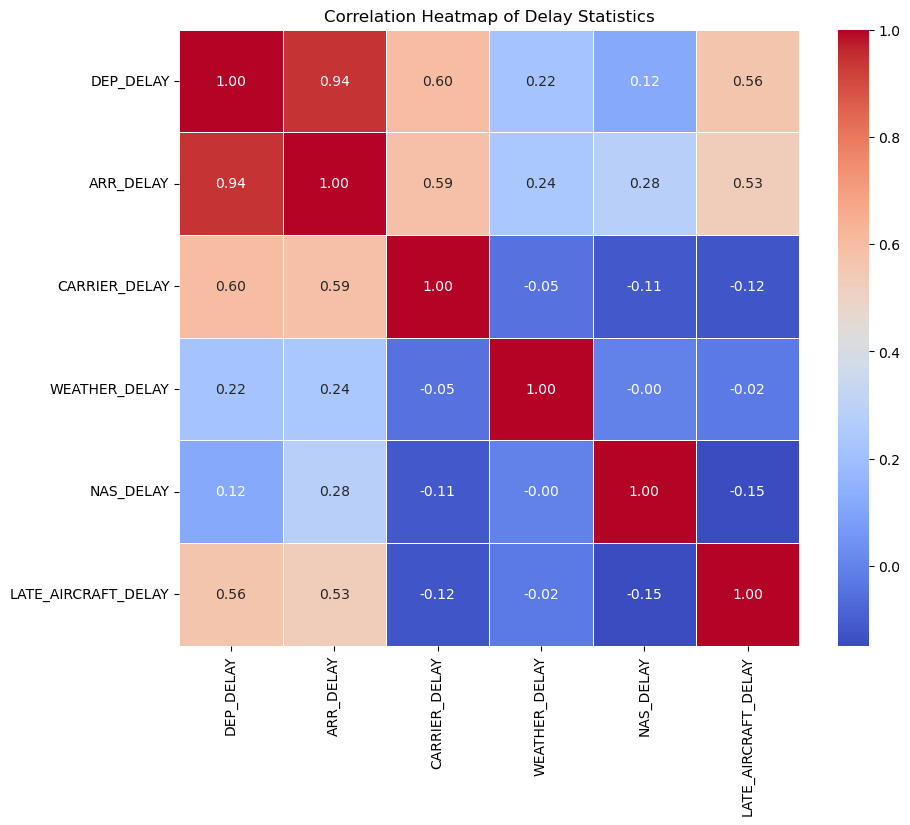

In [66]:
corr_matrix = non_cancel_divert[delay_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Delay Statistics')
plt.show()

Looking at the heatmap we can see the correlations between the delay factors.
- DEP_DELAY and ARR_DELAY have high correlation. This is expected, as delayed departure results in a delayed arrival.
- DEP_DELAY and CARRIER_DELAY have a medium correlation, which means delays caused by the airline are somewhat related to departure delays.
- WEATHER_DELAY has low correlation to other factors, which means weather isn't a big cause of delays.
- LATE_AIRCRAFT_DELAY has medium correlation to DEP_DELAY and ARR_DELAY, which means aircraft delays contribute significantly to delays in departures and arrivals.
- NAS_DELAY has low correlations to other factors, which means it doesn't affect delays that much.


Now lets create box plots for some simple delay analysis, for this we will currently use sampled_data (around 10% of the original), because the data is huge. (todo: try to use full data)

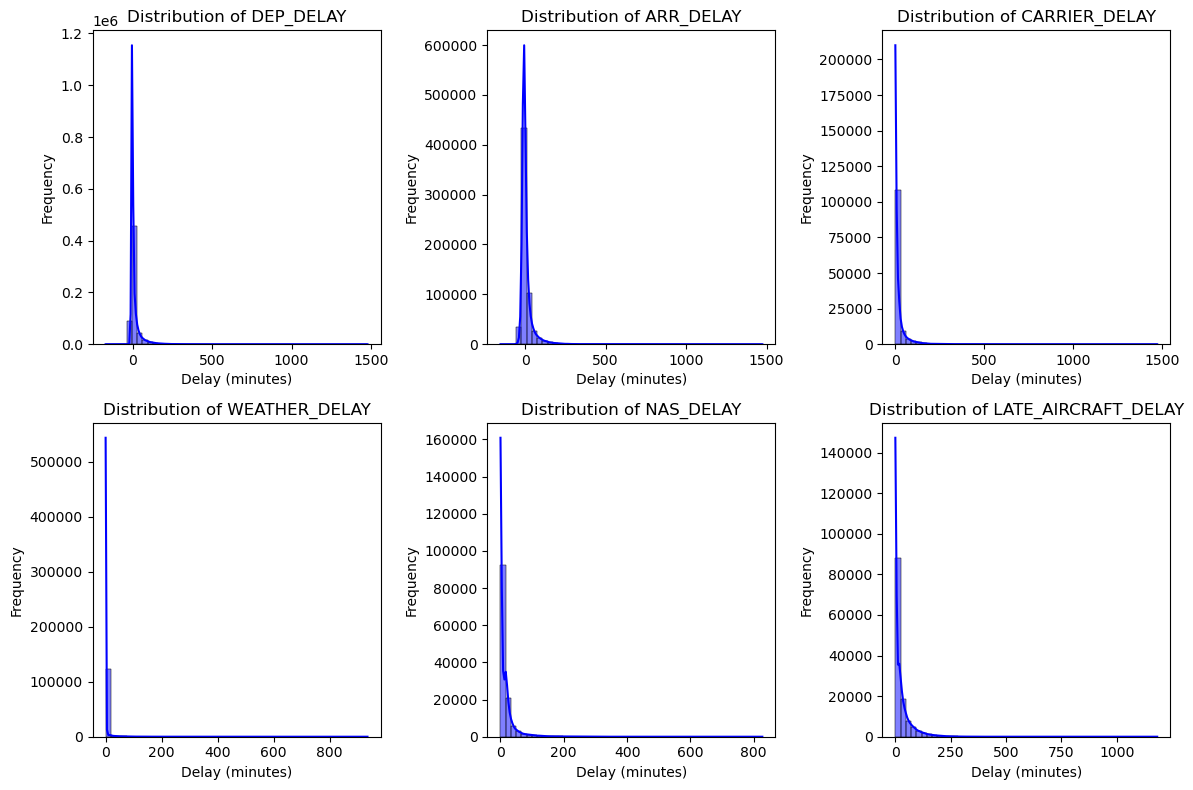

In [74]:
sampled_data = non_cancel_divert.sample(frac=0.1, random_state=42)

plt.figure(figsize=(12, 8))
for i, col in enumerate(delay_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(sampled_data[col], bins=50, kde=True, color='blue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Delay (minutes)')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Histograms show distributions of various types of delays, with most of them being around the lower end of the scale, which means most of the delays are somewhat short, but some delays are absurdly long, which seems odd.

Now let's get into delay factors breakdown by categorical variables.

Starting off with carrier delays.

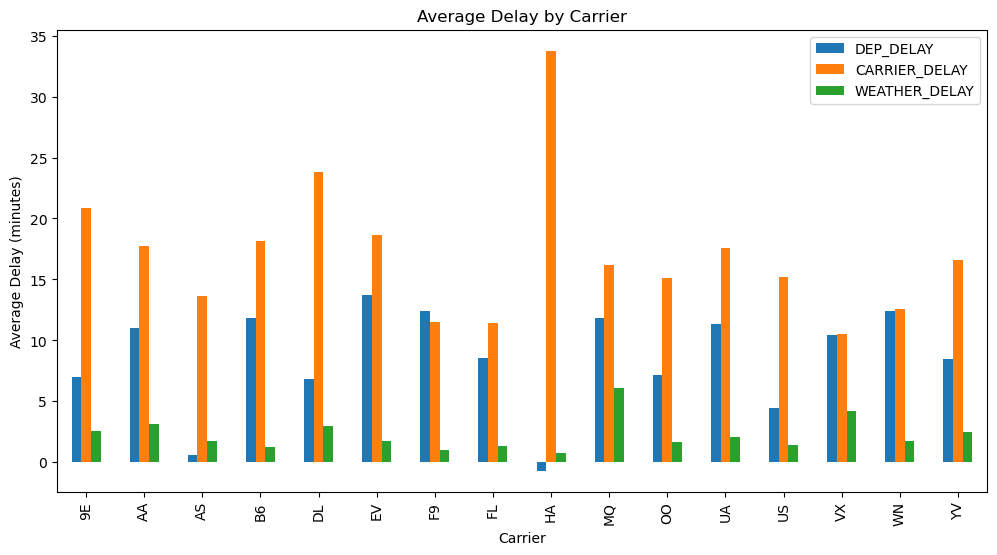

In [97]:
carrier_delay = df_cleaned2.groupby('OP_CARRIER')[['DEP_DELAY', 'CARRIER_DELAY', 'WEATHER_DELAY']].mean()
carrier_delay.plot(kind='bar', figsize=(12, 6))
plt.title('Average Delay by Carrier')
plt.xlabel('Carrier')
plt.ylabel('Average Delay (minutes)')
plt.show()

Mostly it's the same all across the plot, but there's an outlier (HA), which has high CARRIER_DELAY and negative DEP_DELAY, which is odd. But the main factor causing the longest delays is CARRIER_DELAY across all the carriers. The second cause is DEP_DELAY and the lowest is WEATHER_DELAY, which we already concluded from the heatmap.

Next lets look at the average departure delay by the top 30 and bottom 30 airports. We aren't using all of the airports, because there are way too many of them.

C:\Users\Rainer\AppData\Local\Temp\ipykernel_18332\2523970364.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_30_data = df_cleaned2[df_cleaned['ORIGIN'].isin(top_30_airports)]
C:\Users\Rainer\AppData\Local\Temp\ipykernel_18332\2523970364.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bottom_30_data = df_cleaned2[df_cleaned['ORIGIN'].isin(bottom_30_airports)]


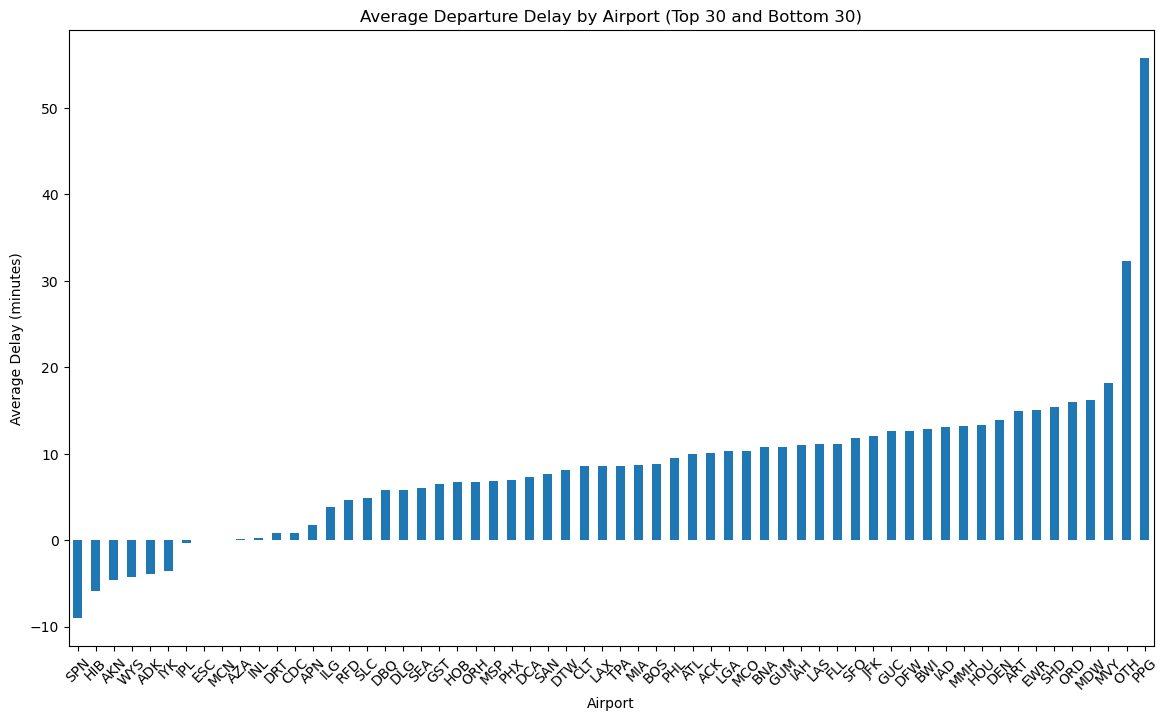

In [99]:
airport_flight_counts = df_cleaned2['ORIGIN'].value_counts()

top_30_airports = airport_flight_counts.head(30).index
bottom_30_airports = airport_flight_counts.tail(30).index
top_30_data = df_cleaned2[df_cleaned['ORIGIN'].isin(top_30_airports)]
bottom_30_data = df_cleaned2[df_cleaned['ORIGIN'].isin(bottom_30_airports)]
top_30_delay = top_30_data.groupby('ORIGIN')['DEP_DELAY'].mean()
bottom_30_delay = bottom_30_data.groupby('ORIGIN')['DEP_DELAY'].mean()

airport_delay = pd.concat([top_30_delay, bottom_30_delay])

# Plot the average departure delays for top 30 and bottom 30 airports
plt.figure(figsize=(14, 8))
airport_delay.sort_values().plot(kind='bar')
plt.title('Average Departure Delay by Airport (Top 30 and Bottom 30)')
plt.xlabel('Airport')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)
plt.show()


Looking at the plot it can be noted that PPG is the airport with the longest average delays (almost an hour!). There are also some airports with negative departure delays which means they depart flights earlier or there are outliers in the data.

Now lets take a look at average departure delay per month.

C:\Users\Rainer\AppData\Local\Temp\ipykernel_18332\1828735205.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned2['FL_DATE'] = pd.to_datetime(df_cleaned2['FL_DATE'], errors='coerce')


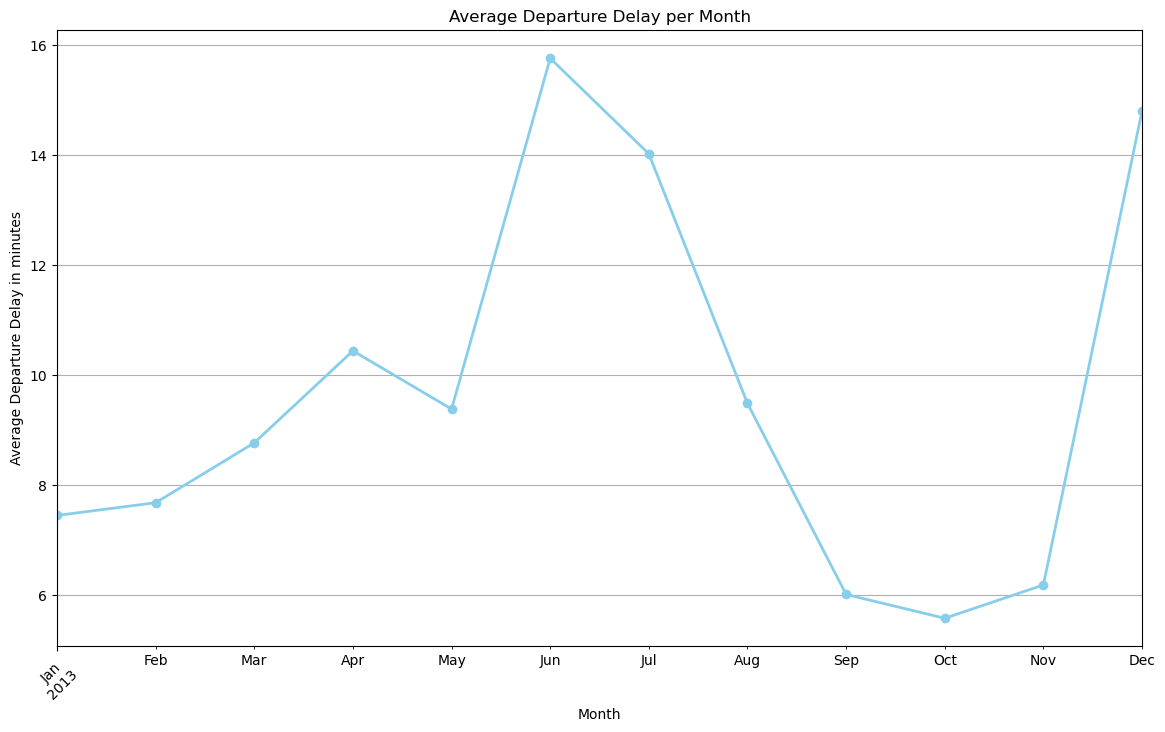

In [102]:
# Extract Year and Month from FL_DATE
df_cleaned2['FL_DATE'] = pd.to_datetime(df_cleaned2['FL_DATE'], errors='coerce')
df_cleaned2.loc[:, 'Year_Month'] = df_cleaned2['FL_DATE'].dt.to_period('M')

# Group by Year-Month and calculate the average departure delay
monthly_delay = df_cleaned2.groupby('Year_Month')['DEP_DELAY'].mean()

# plot
plt.figure(figsize=(14, 8))
monthly_delay.plot(kind='line', marker='o', color='skyblue', linestyle='-', linewidth=2)
plt.title('Average Departure Delay per Month')
plt.xlabel('Month')
plt.ylabel('Average Departure Delay in minutes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Taking look at the plot we can see that the months leading up to the summer months the delay get bigger and bigger and in December the delay also spikes. This is somewhat expected because a lot of travelling takes place in summer and Christmas and New Years is in December.